In [2]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# styling
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
df =  pd.read_csv('../data/youtub_most_popular.csv')

In [4]:
# Print sample
df.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#FFF0F5 ','color': 'black','border-color': '#8b8c8c'})

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,742,NickiMinajAtVEVO,12700000,8367047990.000000,93,Music,2010
1,276,Indosiar,20800000,10126082404.000000,58623,Music,2013
2,280,Charlie Puth,20700000,8609202215.000000,132,Music,2009
3,597,TWICE,14400000,3733683543.000000,852,Music,2016
4,602,Genierock,14300000,13310308313.000000,1540,Music,2008
5,55,SonyMusicIndiaVEVO,42700000,23991411417.000000,3309,Music,2009


df['Views']=df['Views'].str.replace(',','')
df['Video Count']=df['Video Count'].str.replace(',','')
df['Subscribers']=df['Subscribers'].str.replace(',','')
df['Views']=df['Views'].astype('int64')
df['Video Count']=df['Video Count'].astype('int64')
df['Subscribers']=df['Subscribers'].astype('int64')

In [5]:
df.isnull().sum()

Position        0
Artist          0
Subscribers     0
Views           0
Video Count     0
Category        0
Release Date    0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.shape

(222, 7)

In [8]:
# convert columns
df.columns

Index(['Position', 'Artist', 'Subscribers', 'Views', 'Video Count', 'Category',
       'Release Date'],
      dtype='object')

In [9]:
# edit names with last space
df.rename(columns=lambda x: x.strip() , inplace = True)
df.columns

Index(['Position', 'Artist', 'Subscribers', 'Views', 'Video Count', 'Category',
       'Release Date'],
      dtype='object')

In [10]:
df.dtypes

Position          int64
Artist           object
Subscribers       int64
Views           float64
Video Count       int64
Category         object
Release Date      int64
dtype: object

In [11]:
# data type
df['Views']=df['Views'].astype('int64')
df['Video Count']=df['Video Count'].astype('int64')
df['Subscribers']=df['Subscribers'].astype('int64')

In [12]:
# explore analysis
df

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,1,T-Series,222000000,198459000000,17317,Music,2006
1,12,Zee Music Company,86700000,49067711243,6603,Music,2014
2,19,BANGTANTV,70000000,17471090750,1787,Music,2012
3,20,Justin Bieber,69700000,28567240999,247,Music,2007
4,21,HYBE LABELS,67800000,24013849120,971,Music,2008
...,...,...,...,...,...,...,...
217,970,Genius,11100000,2891052624,2797,Music,2011
218,983,Doja Cat,11000000,5459891400,25,Music,2018
219,984,Tyga,11000000,5211071220,160,Music,2009
220,990,unknown boy varun,11000000,3263285883,193,Music,2016


In [13]:
df.shape

(222, 7)

In [14]:
df.head()

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,1,T-Series,222000000,198459000000,17317,Music,2006
1,12,Zee Music Company,86700000,49067711243,6603,Music,2014
2,19,BANGTANTV,70000000,17471090750,1787,Music,2012
3,20,Justin Bieber,69700000,28567240999,247,Music,2007
4,21,HYBE LABELS,67800000,24013849120,971,Music,2008


In [15]:
df.dtypes

Position         int64
Artist          object
Subscribers      int64
Views            int64
Video Count      int64
Category        object
Release Date     int64
dtype: object

In [16]:
df.columns

Index(['Position', 'Artist', 'Subscribers', 'Views', 'Video Count', 'Category',
       'Release Date'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      222 non-null    int64 
 1   Artist        222 non-null    object
 2   Subscribers   222 non-null    int64 
 3   Views         222 non-null    int64 
 4   Video Count   222 non-null    int64 
 5   Category      222 non-null    object
 6   Release Date  222 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.9+ KB


In [18]:
df.describe()

,Position,Subscribers,Views,Video Count,Release Date
count,222.000000,2.220000e+02,2.220000e+02,222.000000,222.000000
mean,441.720721,2.303739e+07,1.309104e+10,2298.815315,2010.720721
std,296.361439,1.876792e+07,1.505430e+10,5846.831776,3.181312
min,1.000000,1.090000e+07,5.469050e+08,7.000000,2005.000000
25%,178.500000,1.330000e+07,6.016301e+09,123.500000,2008.250000
50%,421.000000,1.700000e+07,1.022484e+10,272.000000,2011.000000
75%,687.750000,2.605000e+07,1.640835e+10,1721.750000,2013.000000
max,997.000000,2.220000e+08,1.984590e+11,58623.000000,2019.000000


In [19]:
df.nunique()

Position        222
Artist          222
Subscribers     145
Views           222
Video Count     191
Category          1
Release Date     15
dtype: int64

In [20]:
# visualization
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [21]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'Artist', 'Subscribers'}}

multi_table([nunique_df['Artist'],nunique_df['Subscribers']])

,Artist
Skrillex,1
Genierock,1
Chris Brown,1
Saad Lamjarred | سعد لمجرد,1
Sidhu Moose Wala,1
...,...
Zé Neto e Cristiano,1
The Chainsmokers,1
Sony Music South,1
LuisFonsiVEVO,1


In [22]:
import plotly.express as px

In [23]:
artists=df['Artist'].value_counts()
fig=px.pie(values=artists.values,
          names=artists.index,
          color_discrete_sequence=px.colors.sequential.RdBu,
          title="Most Popular Musicians of Youtube", template='presentation'
          )
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.show();

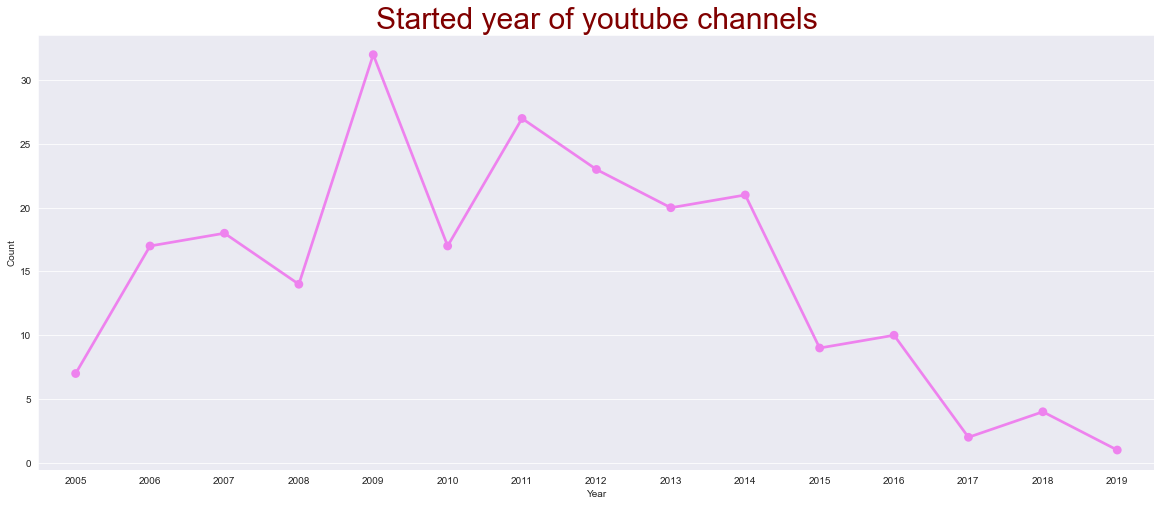

In [24]:
year=df['Release Date'].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index,y=year.values, color='violet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Started year of youtube channels',size=30, color='maroon');

In [25]:
year_mean=df.groupby('Release Date').mean().reset_index()
year_mean

,Release Date,Position,Subscribers,Views,Video Count
0,2005,494.857143,1.772857e+07,1.013097e+10,206.571429
1,2006,331.117647,3.679412e+07,2.478314e+10,2142.529412
2,2007,413.444444,2.596111e+07,1.375123e+10,2867.833333
3,2008,323.857143,2.554286e+07,1.375906e+10,2389.357143
4,2009,468.375000,1.987812e+07,1.364159e+10,512.250000
5,2010,407.941176,2.156471e+07,1.284503e+10,1868.588235
6,2011,411.370370,2.244074e+07,1.265895e+10,3309.370370
7,2012,461.652174,2.382174e+07,1.169608e+10,1926.043478
8,2013,488.100000,1.921000e+07,8.857515e+09,3584.050000
9,2014,451.476190,2.502381e+07,1.602042e+10,5699.619048


In [26]:
# def pltplot(data, xcol, ycol, color, ax, title):
#     sns.pointplot(data=data, x=xcol, y=ycol, color=color, ax=ax).set_title(title, size=10)

In [27]:
# custom_palette = sns.color_palette("Paired", 9)
# sns.palplot(custom_palette)

In [28]:
# import matplotlib as mpl
# font_paths = mpl.font_manager.findSystemFonts()
# font_objects = mpl.font_manager.createFontList(font_paths)
# font_names = [f.name for f in font_objects]
# print (font_names)

In [29]:
# sns.set(font="Verdana")

In [30]:
# subscribers=df.sort_values('Subscribers',ascending=False)
# plt.figure(figsize=(25,10))
# Subscribers=subscribers[:5]
# plt.barplot(x='Artist' ,
#            y="Subscribers",
#            data=subscribers,
#            palette="ch:20_r")
# plt.title('Top 5 Categories that have subscribers',size=20);

In [31]:
# subscribers=df.sort_values('Subscribers',ascending=False)
# plt.figure(figsize=(25,10))
# Subscribers='Subscribers'[ :20]
# sns.barplot(x="Artist",
#            y="Subscribers",
#            data=Subscribers,
#            palette=custom_palette
# plt.title('Top Channels', size 20)

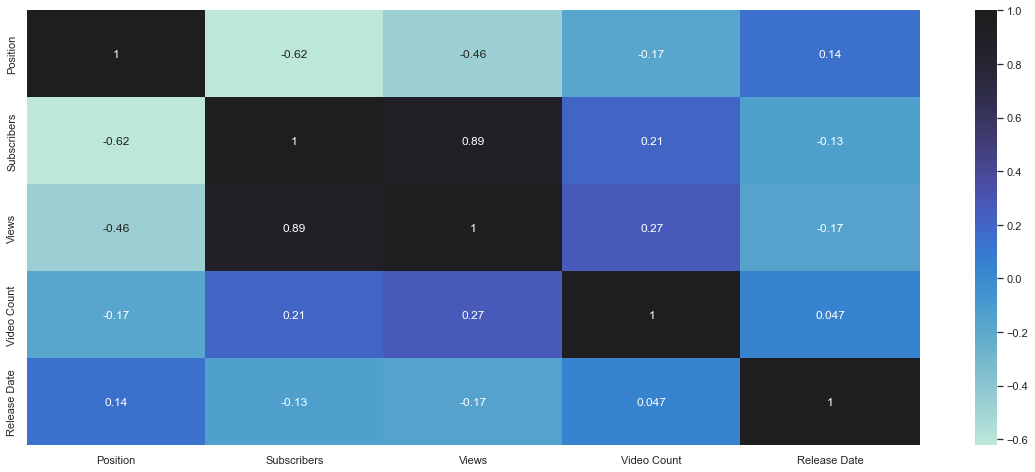

In [32]:
plt.figure(figsize=(20,8))
sns.set_theme('notebook')
sns.heatmap(df.corr(), annot=True, center=True);

In [33]:
fig = px.scatter(df, x="Video Count", y="Views",
                 size="Views", color="Artist",
                 log_x=True, size_max=50,
                 title="Artists with Video views and Video count",
                 marginal_y='rug')
fig.show()

In [34]:
fig = px.scatter(df, x="Subscribers", y="Views",
                 size="Views", color="Artist",
                 log_x=True, size_max=50,
                 title="Artists with Video views and Subscribers",
                 marginal_y='rug') 
fig.show()